# Homework 3

## Part 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

###### 1. Does battery capacity influence the launched price of a smartphone? Check this variability  across all currencies. Is there any type of difference between behaviors?

In [2]:
df = pd.read_csv("/Users/Administrator/Downloads/mobiles_dataset.csv")

In [3]:
df['Launched.Price.Pakistan.USD'] = df['Launched.Price.Pakistan.PKR'] * 0.0036
df['Launched.Price.India.USD'] = df['Launched.Price.India.INR'] * 0.011
df['Launched.Price.China.USD'] = df['Launched.Price.China.CNY'] * 0.14
df['Launched.Price.USA.USD'] = df['Launched.Price.USA.USD']
df['Launched.Price.Dubai.USD'] = df['Launched.Price.Dubai.AED'] * 0.27

df['Launched.Price.USD'] = (
    df['Launched.Price.Pakistan.USD'] + 
    df['Launched.Price.India.USD'] + 
    df['Launched.Price.China.USD'] + 
    df['Launched.Price.USA.USD'] + 
    df['Launched.Price.Dubai.USD']
) / 5

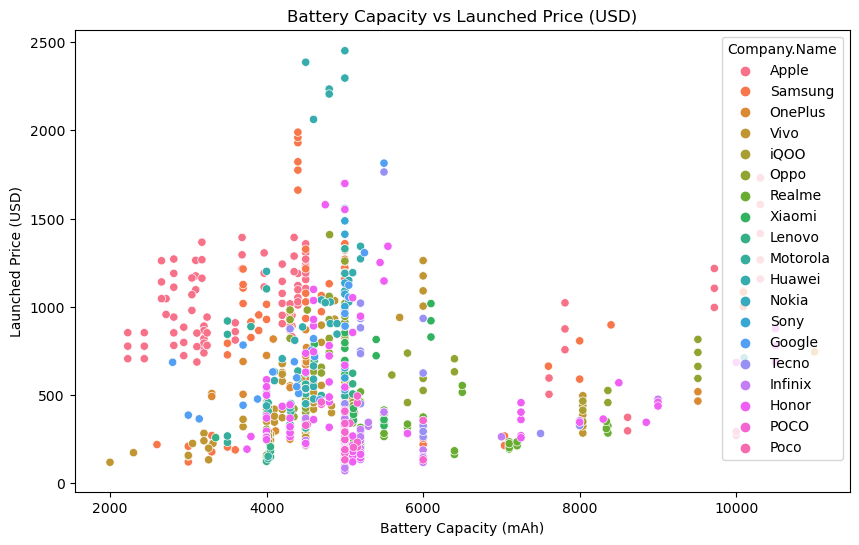

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Battery.Capacity.mAh', y='Launched.Price.USD', hue='Company.Name')
plt.title('Battery Capacity vs Launched Price (USD)')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Launched Price (USD)')
plt.show()

In [15]:
correlation = df['Battery.Capacity.mAh'].corr(df['Launched.Price.USD'])
print(correlation)

-0.04233947739210646


As the correlation coefficient indicates, the battery capacity and the pricing are negatively related.

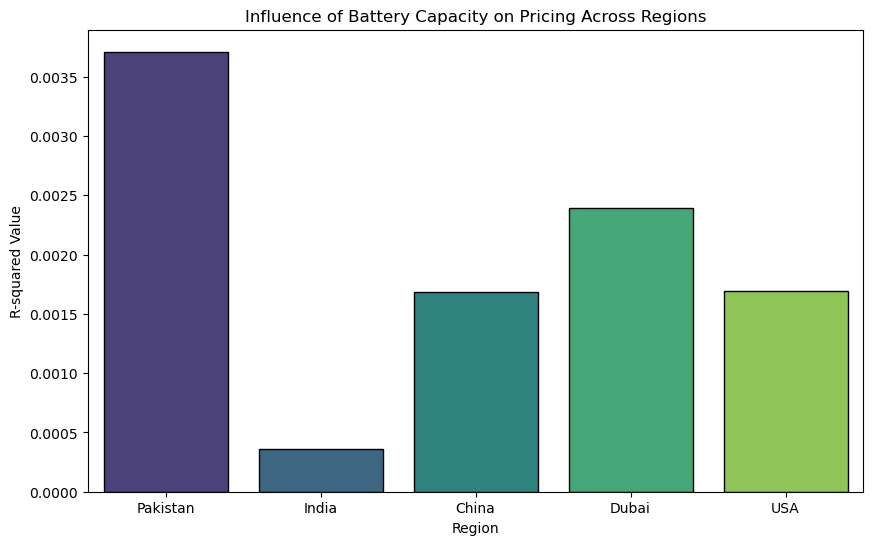

In [18]:
regions = ["Launched.Price.Pakistan.USD", "Launched.Price.India.USD", "Launched.Price.China.USD", "Launched.Price.Dubai.USD", "Launched.Price.USA.USD"]
r_squared_values = []

for region in regions:
    X = df[['Battery.Capacity.mAh']]
    X = sm.add_constant(X) 
    y = df[region] 
    model = sm.OLS(y, X).fit()  
    r_squared_values.append(model.rsquared) 

results = pd.DataFrame({
    'Region': ['Pakistan', 'India', 'China', 'Dubai', 'USA'],
    'R_squared': r_squared_values
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='R_squared', data=results, palette='viridis', edgecolor='black')
plt.title("Influence of Battery Capacity on Pricing Across Regions")
plt.xlabel("Region")
plt.ylabel("R-squared Value")
plt.show()

The R squared value shows how much the battery capacity unfluences the pricing from eac regieon. The higher R squared value, the more influence on the pricing. From this barplot we can see that in Pakistan the battery capacity influences the pricing the most, while in India the least. 

###### 2. Does RAM size impact the price of smartphones? Check this variability across all currencies. Is there any type of difference between behaviors? 

In [21]:
df['RAM'] = df['RAM'].str.split(' / ').str[0].str.replace('GB', '').astype(float)
df = df.dropna()

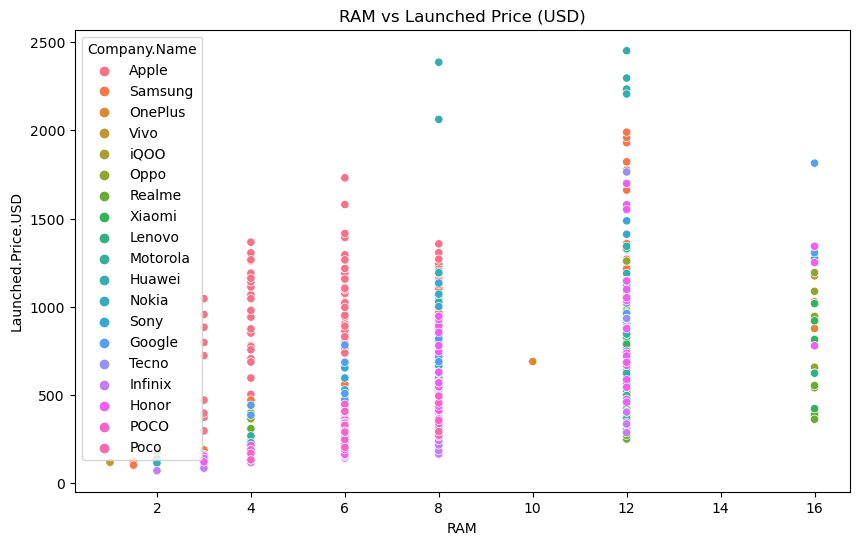

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='RAM', y='Launched.Price.USD', hue='Company.Name')
plt.title('RAM vs Launched Price (USD)')
plt.show()

In [23]:
correlation_ram_price = df['RAM'].corr(df['Launched.Price.USD'])
print(f"Correlation between RAM and Launched Price (USD): {correlation_ram_price}")

Correlation between RAM and Launched Price (USD): 0.446790483264809


We can see see that the correlation coeficient between RAM and price is positive and is moderately strong.

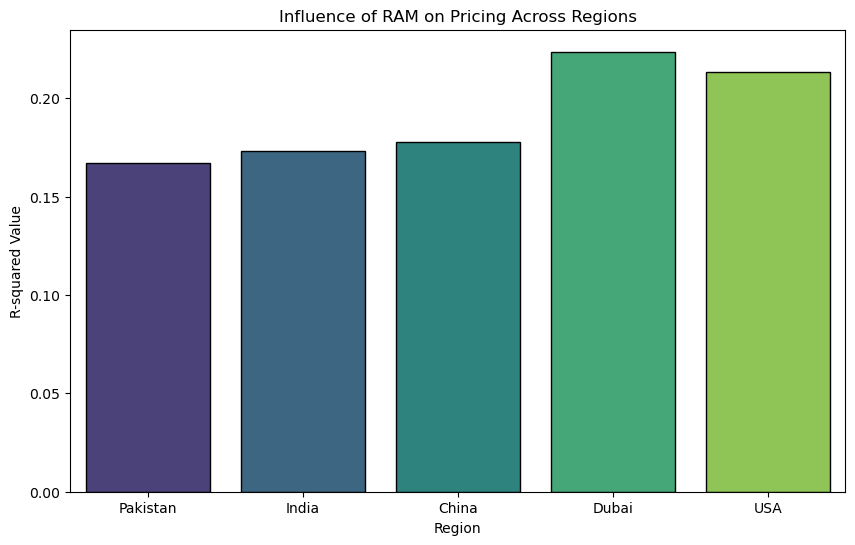

In [24]:
regions = ["Launched.Price.Pakistan.USD", "Launched.Price.India.USD", "Launched.Price.China.USD", "Launched.Price.Dubai.USD", "Launched.Price.USA.USD"]
r_squared_values = []

for region in regions:
    X = df[['RAM']]
    X = sm.add_constant(X)
    y = df[region]
    model = sm.OLS(y, X).fit()
    r_squared_values.append(model.rsquared)

results = pd.DataFrame({
    'Region': ['Pakistan', 'India', 'China', 'Dubai', 'USA'],
    'R_squared': r_squared_values
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='R_squared', data=results, palette='viridis', edgecolor='black')
plt.title("Influence of RAM on Pricing Across Regions")
plt.xlabel("Region")
plt.ylabel("R-squared Value")
plt.show()

We can see see that the correlation coeficient between RAM and price is positive and is moderately strong.

##### 3. Do Apple devices have a higher price variation across different regions compared to other brands? In which country do Apple devices have the highest markup? Are there brands with more stable pricing across regions? 

In [26]:
apple_df = df[df['Company.Name'] == 'Apple']
df['Price_Variation'] = df[['Launched.Price.Pakistan.USD', 'Launched.Price.India.USD', 'Launched.Price.China.USD', 'Launched.Price.Dubai.USD', 'Launched.Price.USA.USD']].apply(lambda x: max(x) - min(x), axis=1)

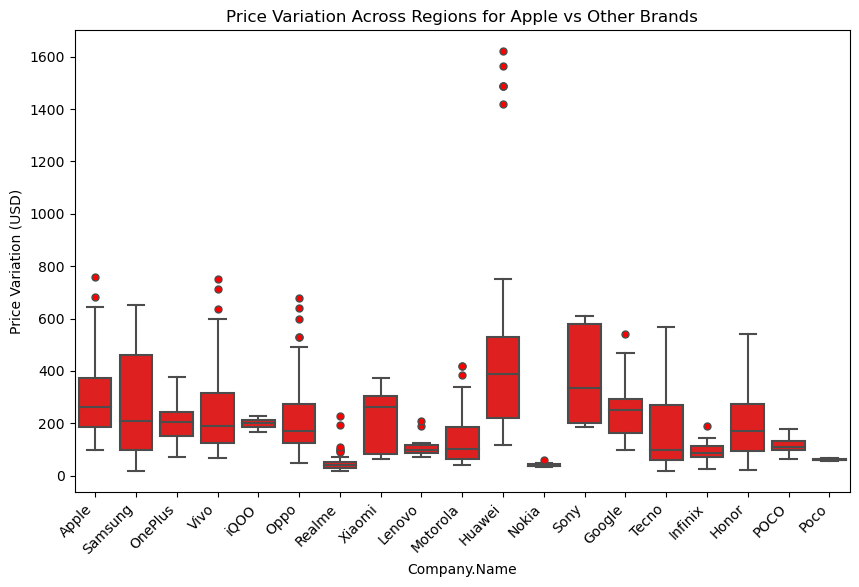

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Company.Name', y='Price_Variation', data=df, color='red', flierprops=dict(markerfacecolor='red', marker='o', markersize=5))
plt.xticks(rotation=45, ha='right')
plt.title("Price Variation Across Regions for Apple vs Other Brands")
plt.ylabel("Price Variation (USD)")
plt.show()

From the boxplots we can asume that samsung has the highest price variation across diffrent regions.
Poco, Lenovo and Nokia seem to have more stable pricing across regions.

In [28]:
mean_prices = apple_df[['Launched.Price.Pakistan.USD', 'Launched.Price.India.USD', 'Launched.Price.China.USD', 'Launched.Price.Dubai.USD', 'Launched.Price.USA.USD']].mean()
highest_markup_country = mean_prices.idxmax()

highest_markup_country

'Launched.Price.India.USD'

India has the highest markup for Apple

###### 4: Do all smartphone brands have flagship and budget-friendly models, or do some brands only focus on premium devices? 

In [29]:
df['Price_Segment'] = pd.cut(df['Launched.Price.USA.USD'], bins=[0, 300, 700, float('inf')], labels=['Budget', 'Mid-range', 'Premium'])
segment_distribution = df.groupby(['Company.Name', 'Price_Segment']).size().unstack(fill_value=0)
segment_distribution['Covers_All_Segments'] = (segment_distribution['Budget'] > 0) & (segment_distribution['Mid-range'] > 0) & (segment_distribution['Premium'] > 0)
print(segment_distribution)

Price_Segment  Budget  Mid-range  Premium  Covers_All_Segments
Company.Name                                                  
Apple               0          8       89                False
Google              0         12        9                False
Honor              29         37       25                 True
Huawei              0         15       27                False
Infinix            41         15        0                False
Lenovo             10          5        0                False
Motorola           26         29        7                 True
Nokia              10          0        0                False
OnePlus            10         23       20                 True
Oppo               46         59       24                 True
POCO               16         14        0                False
Poco                2          0        0                False
Realme             44         25        0                False
Samsung            26         19       39              

We can see that some brands such as Apple, Google and Huawei do not have budget friendly models.

###### 5. Which region offers the most affordable smartphone prices on average? Are there any brands that price their phones significantly lower in one region compared to others?

In [30]:
average_price_by_region = df[['Launched.Price.Pakistan.USD', 'Launched.Price.India.USD', 
                             'Launched.Price.China.USD', 'Launched.Price.Dubai.USD', 
                             'Launched.Price.USA.USD']].mean()

print(average_price_by_region)

Launched.Price.Pakistan.USD    449.934239
Launched.Price.India.USD       552.823682
Launched.Price.China.USD       530.741362
Launched.Price.Dubai.USD       586.029016
Launched.Price.USA.USD         579.623784
dtype: float64


AS we can see Pakistan offers the most affordable smartphone pieces on avarage.

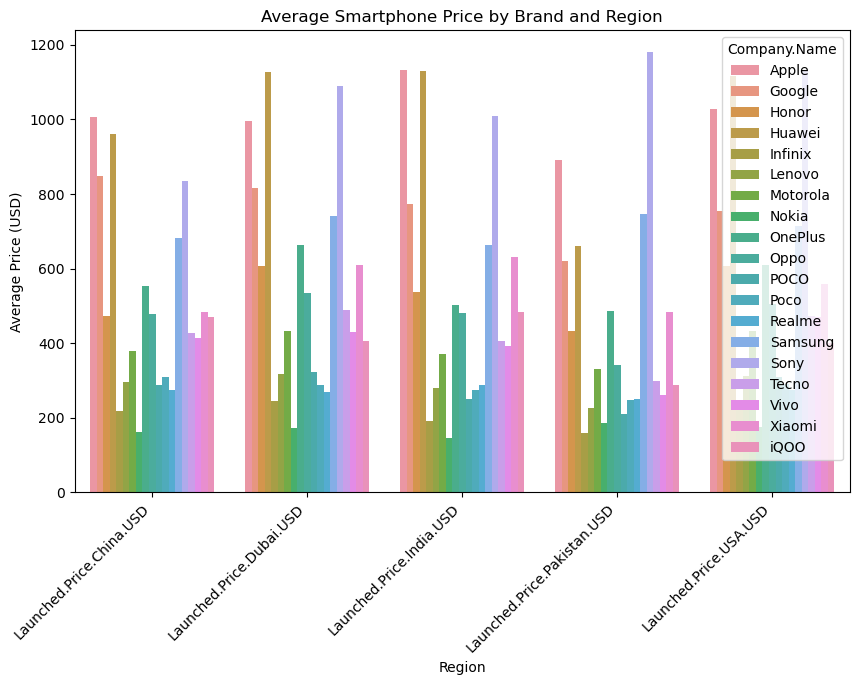

In [33]:
brand_avg_price_by_region = df.melt(id_vars=['Company.Name'], 
                                    value_vars=['Launched.Price.Pakistan.USD', 'Launched.Price.India.USD', 
                                                'Launched.Price.China.USD', 'Launched.Price.Dubai.USD', 
                                                'Launched.Price.USA.USD'], 
                                    var_name='Region', value_name='Price')

brand_avg_price_by_region = brand_avg_price_by_region.groupby(['Company.Name', 'Region']).agg(AveragePrice=('Price', 'mean')).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='AveragePrice', hue='Company.Name', data=brand_avg_price_by_region, dodge=True)
plt.title('Average Smartphone Price by Brand and Region')
plt.xlabel('Region')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

From here, we can observe that there are no brands that price their phones significantly lower in one region compared to others.

### Part 2

###### 1. Plot a bar chart for average price per region in USD.

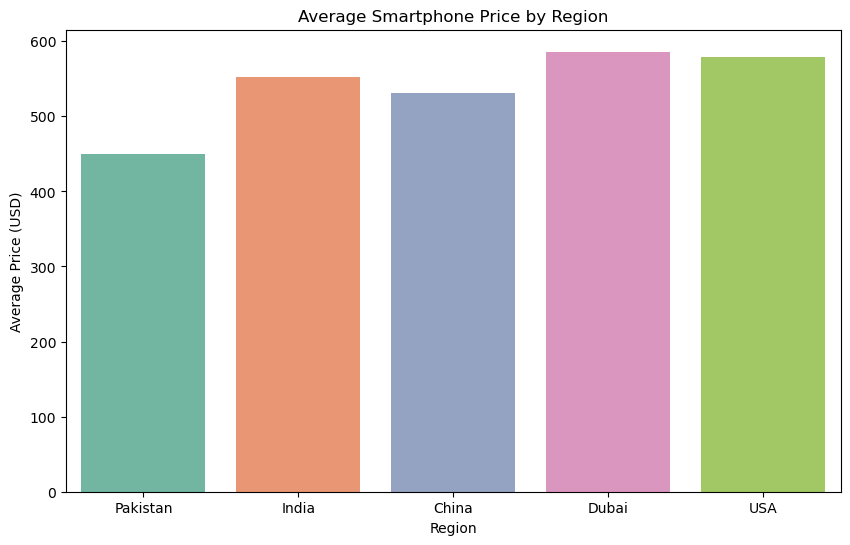

In [35]:
avg_price_data = pd.DataFrame({
    'Region': ['Pakistan', 'India', 'China', 'Dubai', 'USA'],
    'AveragePrice': average_price_by_region
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='AveragePrice', data=avg_price_data, palette='Set2')
plt.title('Average Smartphone Price by Region')
plt.xlabel('Region')
plt.ylabel('Average Price (USD)')
plt.show()

 ###### 2. Create a pie chart of the market share of smartphone brands. 

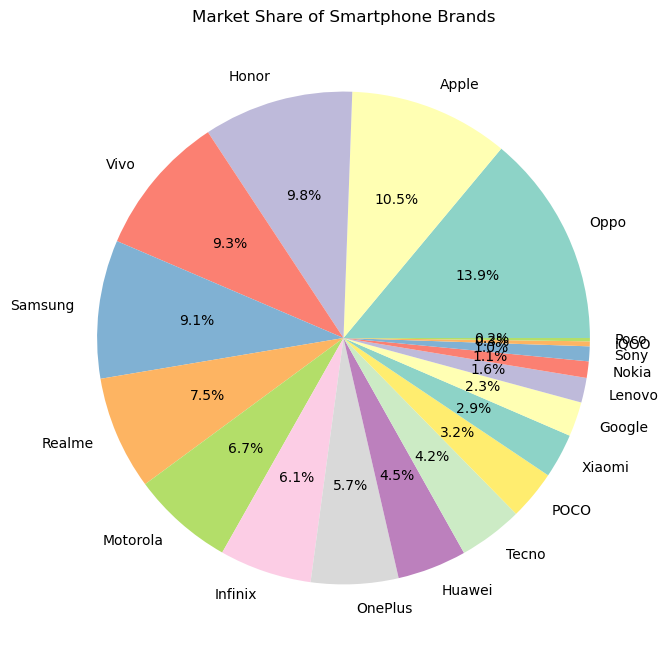

In [37]:
brand_market_share = df['Company.Name'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(brand_market_share, labels=brand_market_share.index, autopct='%1.1f%%', colors=sns.color_palette("Set3", len(brand_market_share)))
plt.title("Market Share of Smartphone Brands")
plt.show()

### Part 4

In [4]:
if df['Mobile.Weight'].dtype == 'object':
    df['Mobile.Weight'] = df['Mobile.Weight'].str.replace('g', '').astype(float)
else:
    df['Mobile.Weight'] = pd.to_numeric(df['Mobile.Weight'], errors='coerce')
df['Processor'] = df['Processor'].astype('category')

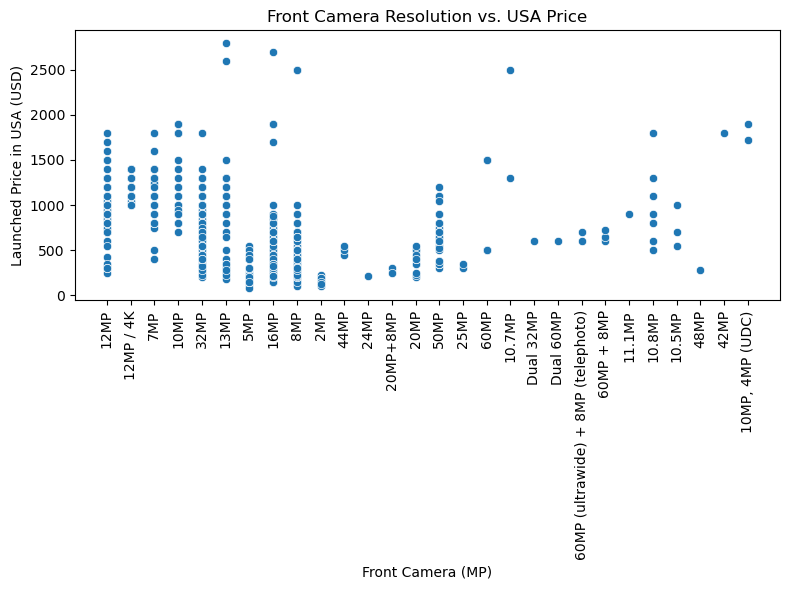

In [13]:
# Plot 1: Front Camera Resolution vs. USA Price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Front.Camera', y='Launched.Price.USA.USD')
plt.title('Front Camera Resolution vs. USA Price')
plt.xlabel('Front Camera (MP)')
plt.ylabel('Launched Price in USA (USD)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

From the plot we can observe that the Front camer MP does not play a boig role in the phone pricing. In fact the most expensive ohone has 13MP front camera.

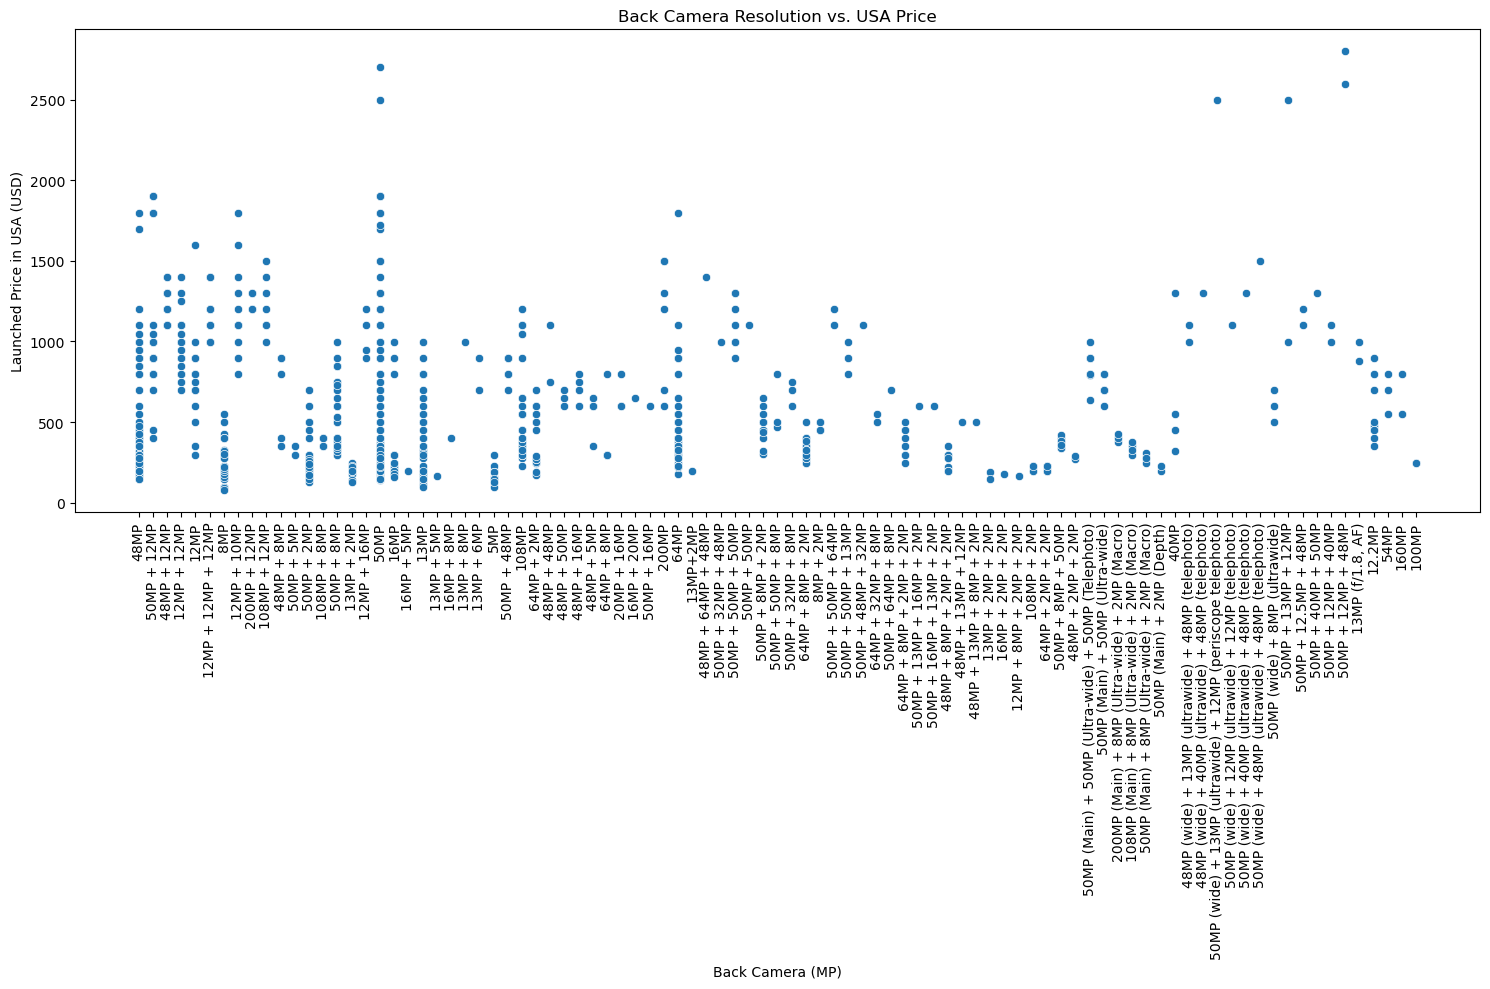

In [19]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x='Back.Camera', y='Launched.Price.USA.USD')
plt.title('Back Camera Resolution vs. USA Price')
plt.xlabel('Back Camera (MP)')
plt.ylabel('Launched Price in USA (USD)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

We can aobserve that most expensive phones, have some variations of a 50MP back camera. Although there are some more powerful cameras here they can be much cheaper. While there is a pattern of the standard of expensive mobiles having good cameras, it does not mean that the correlation is that big considering this observation.

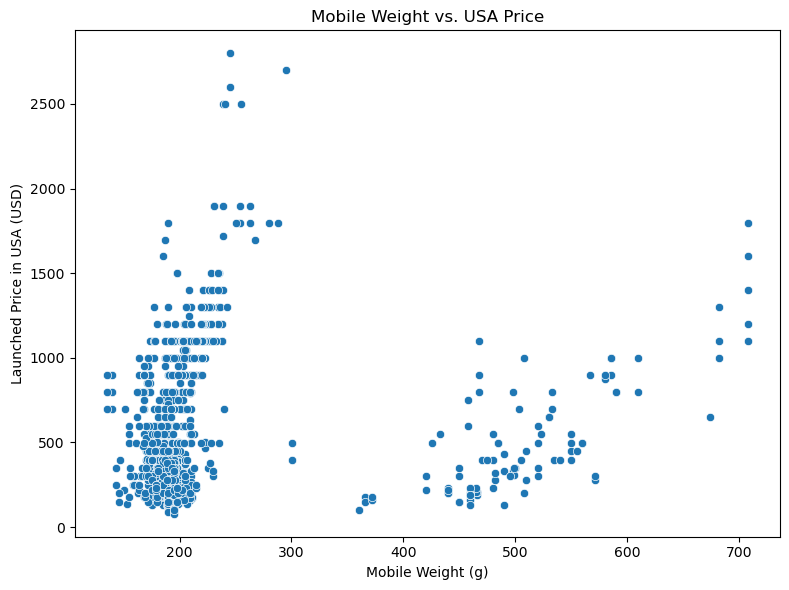

In [6]:
# Plot 3: Mobile Weight vs. USA Price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Mobile.Weight', y='Launched.Price.USA.USD')
plt.title('Mobile Weight vs. USA Price')
plt.xlabel('Mobile Weight (g)')
plt.ylabel('Launched Price in USA (USD)')
plt.tight_layout()
plt.show()

We can observe that most expensive phones are likely to be lighter.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_23320\246517676.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df[numeric_cols].corr()


Correlation Matrix:
                         Screen.Size.inches  Mobile.Weight  \
Screen.Size.inches                1.000000       0.974540   
Mobile.Weight                     0.974540       1.000000   
Launched.Price.USA.USD            0.078704       0.100893   

                        Launched.Price.USA.USD  
Screen.Size.inches                    0.078704  
Mobile.Weight                         0.100893  
Launched.Price.USA.USD                1.000000  


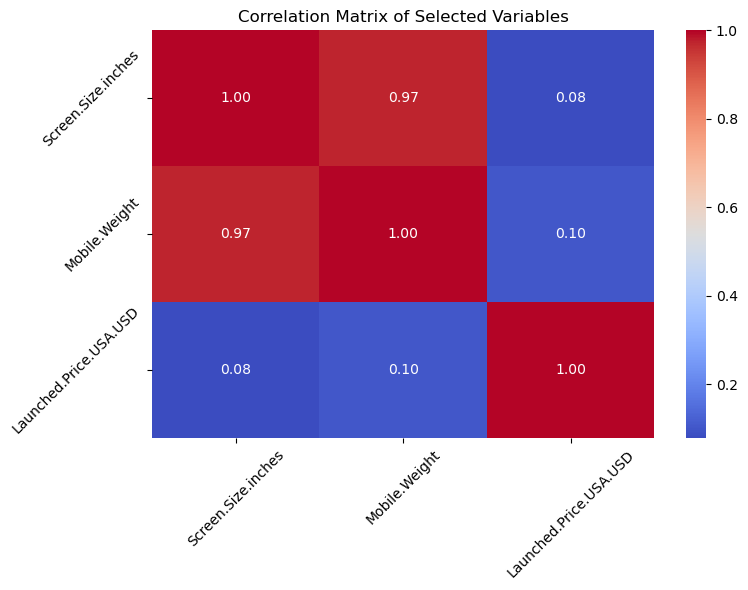

In [24]:
numeric_cols = ['Front.Camera', 'Back.Camera', 'Screen.Size.inches', 'Mobile.Weight', 'Launched.Price.USA.USD']

# Calculate the correlation matrix
corr_matrix = df[numeric_cols].corr()

# Print the correlation matrix
print("Correlation Matrix:\n", corr_matrix)

# Draw a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Variables')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

As we can see from the correlation matrix the screen size and the mobile weight have very little affect on the pricing of the phone